# Importing the libraries needed for the CNN

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading data for CNN

In [2]:
train_dir = os.path.join('../data/processed_data/dataset')
labels = ['accidents', 'beer bottles', 'beer can', 'brawl', 'cc adict', 'cycle theft', 'drunk driver','drunk people']

In [3]:
# checking the size of data available to us for training out model

for label in labels:
    directory = os.path.join(train_dir, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "accidents":	 20
Images of label "beer bottles":	 55
Images of label "beer can":	 97
Images of label "brawl":	 26
Images of label "cc adict":	 63
Images of label "cycle theft":	 17
Images of label "drunk driver":	 9
Images of label "drunk people":	 137


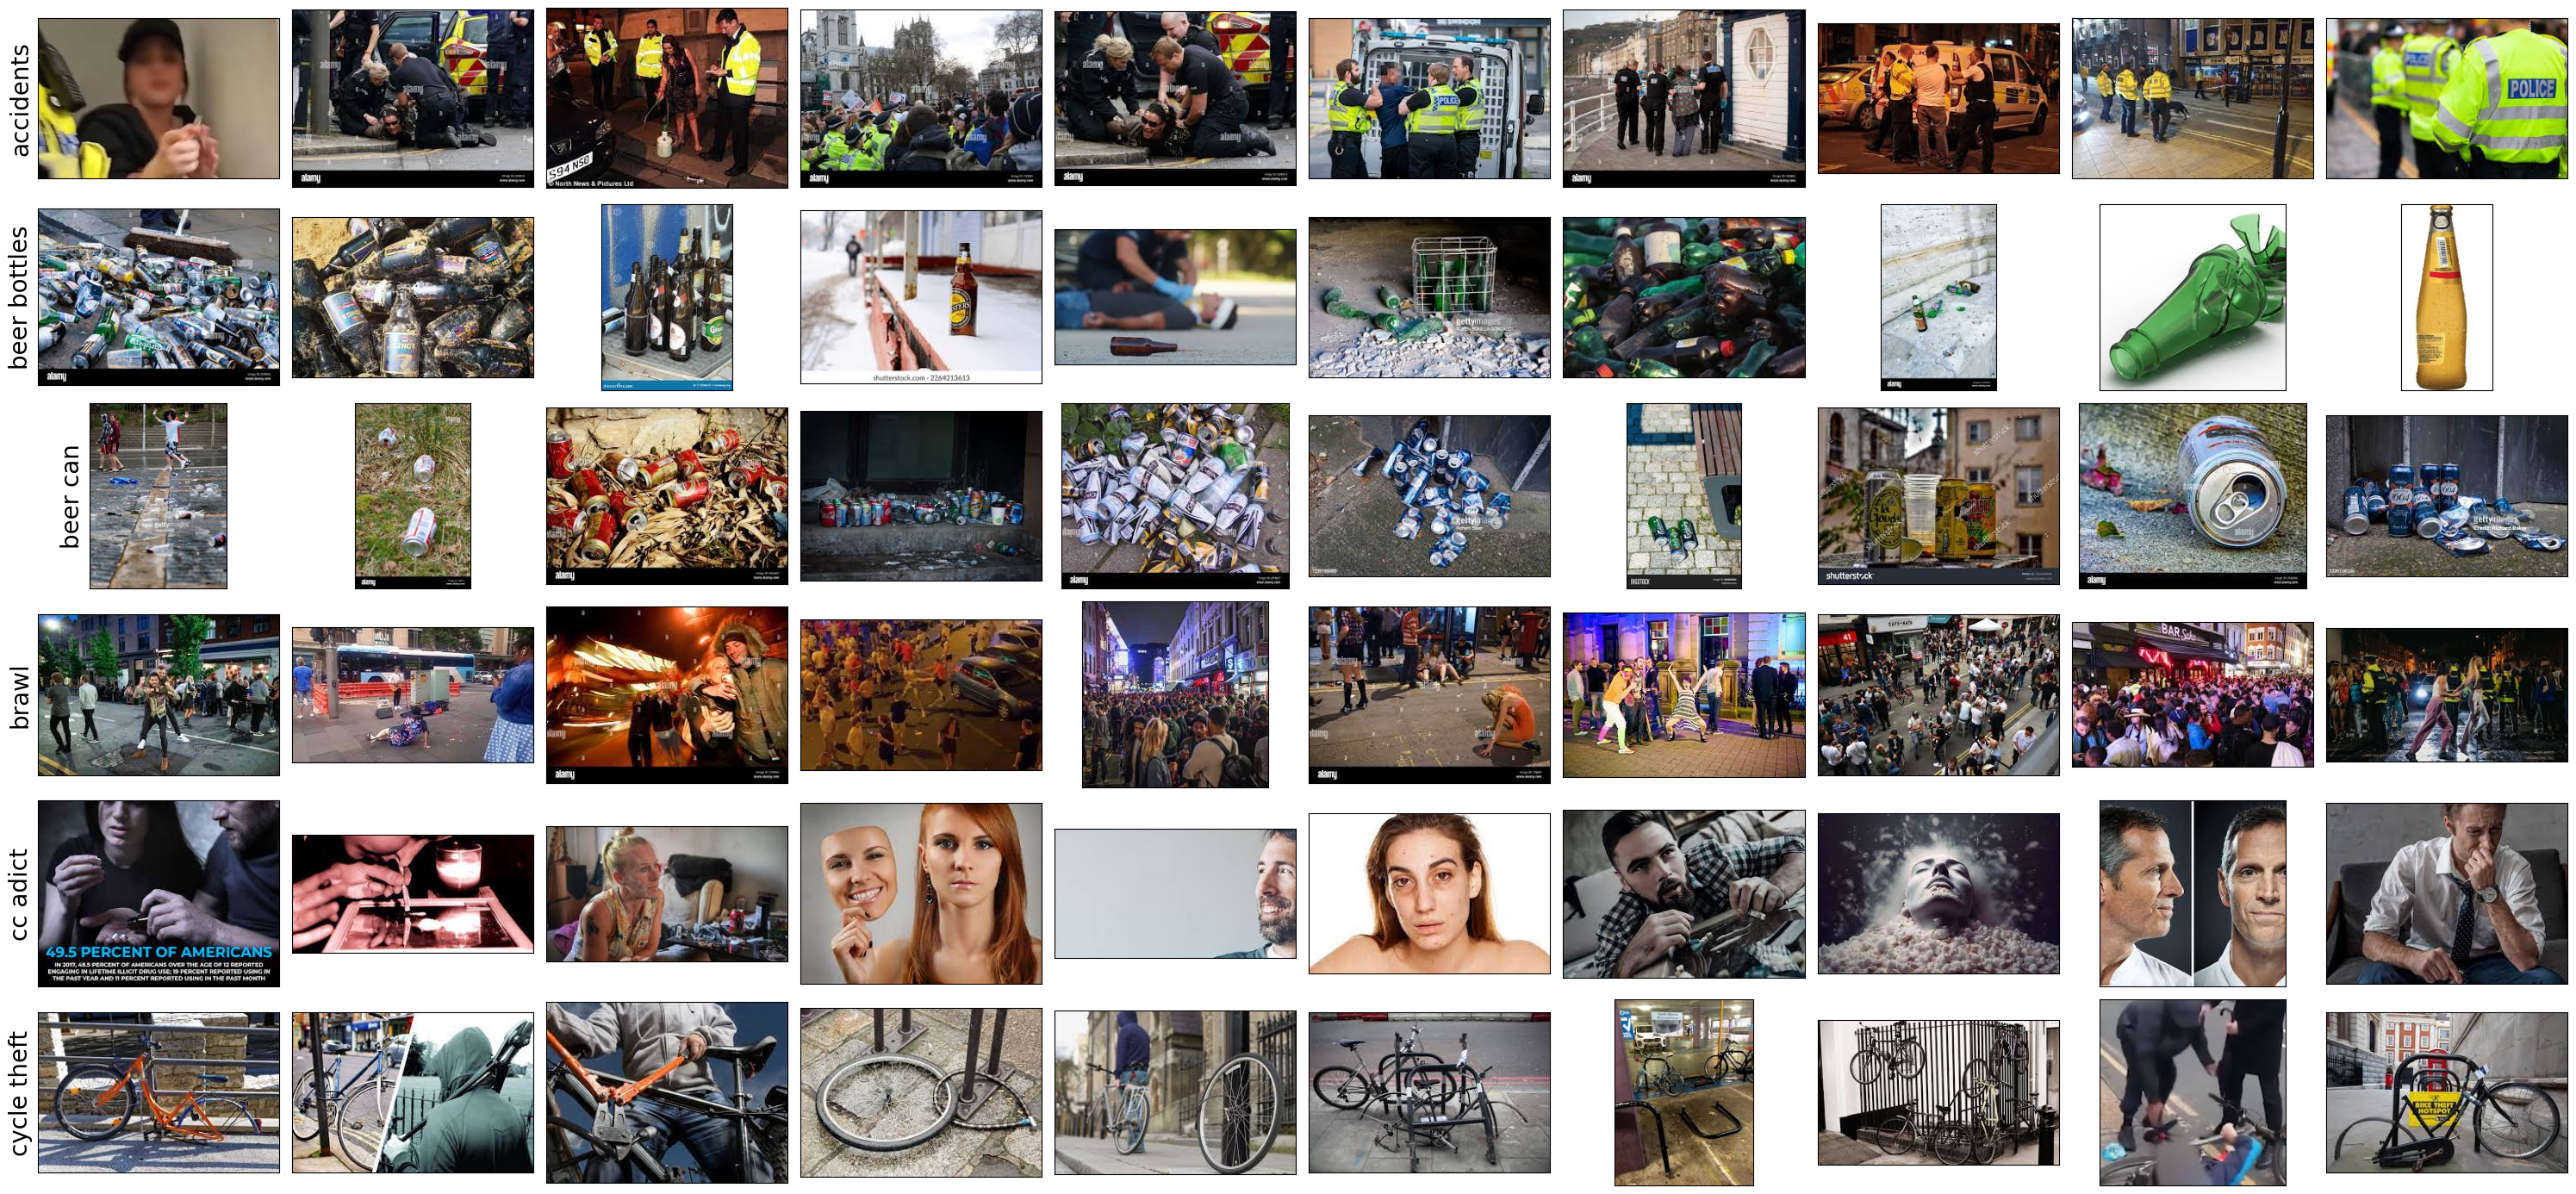

In [4]:
# plotting images of different review for understanding the dataset

plt.figure(figsize=(30,14))

for i in range(6):
    directory = os.path.join(train_dir, labels[i])
    for j in range(10):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        
        plt.subplot(6, 10, i*10 + j + 1)
        plt.imshow(img)
        
        if j == 0:
            plt.ylabel(labels[i], fontsize=20)
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [5]:
# checking size of individual image

directory = os.path.join(train_dir, 'accidents')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(183, 275, 3)

In [6]:
# creating the model

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(None, None, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.1),
    
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.05),
    
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.05),

  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(8, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 32)    896       
                                                                 
 batch_normalization (Batch  (None, None, None, 32)    128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 batch_normalization_1 (Bat  (None, None, None, 32)    128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 32)    0         
 D)                                                              
                                                        

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy','categorical_accuracy'])

In [8]:
train_datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                                   rotation_range=15,zoom_range=0.1,
                                   width_shift_range=0.15,height_shift_range=0.15,
                                   shear_range=0.1,
                                   fill_mode="nearest",
                                   rescale=1./255., 
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(384, 512), batch_size=32, class_mode='binary', subset='validation')

Found 342 images belonging to 8 classes.
Found 82 images belonging to 8 classes.


In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [10]:
history = model.fit(train_generator, epochs=50, verbose=2, validation_data=validation_generator, callbacks=[callbacks])

Epoch 1/50
11/11 - 93s - loss: 3.1044 - accuracy: 0.2164 - categorical_accuracy: 0.0497 - val_loss: 1.9790 - val_accuracy: 0.3293 - val_categorical_accuracy: 0.0000e+00 - 93s/epoch - 8s/step
Epoch 2/50
11/11 - 82s - loss: 2.2318 - accuracy: 0.2865 - categorical_accuracy: 0.0497 - val_loss: 1.9487 - val_accuracy: 0.2317 - val_categorical_accuracy: 0.0000e+00 - 82s/epoch - 7s/step
Epoch 3/50
11/11 - 83s - loss: 2.2214 - accuracy: 0.2924 - categorical_accuracy: 0.0409 - val_loss: 1.8709 - val_accuracy: 0.2439 - val_categorical_accuracy: 0.0000e+00 - 83s/epoch - 8s/step
Epoch 4/50
11/11 - 84s - loss: 1.9368 - accuracy: 0.3450 - categorical_accuracy: 0.0731 - val_loss: 2.0161 - val_accuracy: 0.2195 - val_categorical_accuracy: 0.0000e+00 - 84s/epoch - 8s/step
Epoch 5/50
11/11 - 198s - loss: 2.1101 - accuracy: 0.2953 - categorical_accuracy: 0.0380 - val_loss: 1.9626 - val_accuracy: 0.1220 - val_categorical_accuracy: 0.0000e+00 - 198s/epoch - 18s/step
Epoch 6/50
11/11 - 85s - loss: 1.8663 - ac

[[[[179. 142.  74.]
   [198. 161.  93.]
   [207. 169. 106.]
   ...
   [243. 201. 125.]
   [243. 201. 125.]
   [243. 201. 125.]]

  [[169. 132.  64.]
   [201. 164.  96.]
   [208. 170. 107.]
   ...
   [230. 191. 114.]
   [232. 190. 114.]
   [232. 190. 114.]]

  [[169. 132.  64.]
   [218. 181. 113.]
   [237. 199. 136.]
   ...
   [208. 169.  92.]
   [208. 169.  92.]
   [208. 169.  92.]]

  ...

  [[ 87.  82.  50.]
   [126. 121.  92.]
   [109. 104.  84.]
   ...
   [ 38.  33.  30.]
   [ 41.  35.  35.]
   [ 44.  35.  36.]]

  [[130. 125.  93.]
   [152. 147. 118.]
   [133. 128. 108.]
   ...
   [ 38.  34.  33.]
   [ 28.  24.  25.]
   [ 46.  40.  44.]]

  [[104. 100.  65.]
   [ 96.  91.  61.]
   [103.  98.  76.]
   ...
   [ 43.  39.  40.]
   [ 66.  64.  67.]
   [ 70.  65.  71.]]]]
[[[[179. 142.  74.]
   [198. 161.  93.]
   [207. 169. 106.]
   ...
   [243. 201. 125.]
   [243. 201. 125.]
   [243. 201. 125.]]

  [[169. 132.  64.]
   [201. 164.  96.]
   [208. 170. 107.]
   ...
   [230. 191. 114.]
  

Text(0.5, 1.0, 'Actual: beer bottles      Pred: beer bottles')

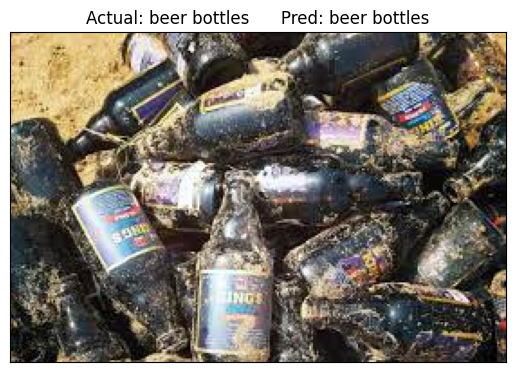

In [12]:
cat=1
ind=1
directory = os.path.join(train_dir, labels[cat % 8])
path = os.path.join(directory, os.listdir(directory)[ind])
img = mpimg.imread(path)
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
print(x)
images = np.vstack([x])
print(images)
classes = model.predict(images)
pred = labels[np.argmax(classes)]

    
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Actual: {}      Pred: {}'.format(labels[cat], pred))